## Introduction
### In this kernel, I will explore the types of objects associated with each culture and talk about the similarities and differences between cultures. I will group different cultures based on their geographic locations and analyze each one separately.

<center><img src="https://i.imgur.com/vHYGK5g.jpg" width="500px"></center>

### Import necessary libraries

In [ ]:
import os
import gc
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
from collections import Counter
from operator import itemgetter
import scipy
import cv2
from cv2 import imread
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Specify constants

In [ ]:
DATA_LEN = 109237
SAMPLE_SIZE= 50000

### Select 50k random rows from the data

In [ ]:
rows = np.arange(0, DATA_LEN)
select_rows = np.random.choice(rows, SAMPLE_SIZE, replace=False)

### Load images from the selected rows

In [ ]:
train_images = []
image_dirs = np.take(os.listdir('../input/train'), select_rows)

for image_dir in tqdm(sorted(image_dirs)):
    image = imread('../input/train/'+image_dir)
    train_images.append(image)
    del image
    gc.collect()
    
train_images = np.array(train_images)

### Load multilabel targets

In [ ]:
train_df = pd.read_csv('../input/train.csv')
targets_df = train_df.loc[(train_df.id.apply(lambda x: x + '.png')).isin(image_dirs)]

### Create dictionary for cultures and tags

In [ ]:
labels_df = pd.read_csv('../input/labels.csv')
label_dict = dict(zip(labels_df.attribute_id, labels_df.attribute_name))
for key in label_dict:
    if 'culture' in label_dict[key]:
        label_dict[key] = label_dict[key][9:]
    if 'tag' in label_dict[key]:
        label_dict[key] = label_dict[key][5:]

### Structure the labels into a list of lists

In [ ]:
train_targets = []

for targets in targets_df.attribute_ids:
    target = targets.split()
    target = list(map(lambda x: label_dict[int(x)], target))
    train_targets.append(target)
    
train_targets = np.array(train_targets)

### Visualize some images from the data

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(50, 50))
count = 0

for i in range(4):
    for j in range(4):
        ax[i, j].imshow(cv2.cvtColor(train_images[count], cv2.COLOR_BGR2RGB))
        ax[i, j].set_title(str(train_targets[count]), fontsize=24)
        count = count + 1

## Culture Analysis

### Define functions for visualizing the images and their tags

In [720]:
def display_culture_examples(culture, fraction=1, max_count=5):
    count = 0
    for i in range(int(len(train_images)*fraction)):
        if count == max_count:
            break
        if culture in train_targets[i]:
            fig, ax = plt.subplots(figsize=(3, 3))
            ax.imshow(cv2.cvtColor(train_images[i], cv2.COLOR_BGR2RGB))
            plt.title(train_targets[i], fontsize=8)
            plt.show()
            matplotlib.rcParams.update(matplotlib.rcParamsDefault)
            count = count + 1
            
def show_common_tags(culture, palette):
    tags = []
    for i in range(len(train_images)):
        if culture in train_targets[i]:
            tags.extend(train_targets[i])
    tag_counts = Counter(tags)
    size = len(tag_counts.keys())
    tags_df = pd.DataFrame(np.zeros((size, 2)))
    tags_df.columns = ['tag', 'count']
    tags_df['tag'] = list(tag_counts.keys())
    tags_df['count'] = list(tag_counts.values())
    tags_df = tags_df.sort_values(by=['count'], ascending=False)
    tags_df = tags_df.reset_index()
    del tags_df['index']
    tag_counts = sorted(tag_counts.items(), key = lambda kv:(kv[1], kv[0]))
    tags = reversed(list(tag_counts)[-6:-1])
    
    print("MOST COMMON " + culture.upper() + " TAGS")
    print("")
    for i, tag in enumerate(tags_df[1:6].tag):
        print(str(i+1) + '). ' + tag)
    
    sns.set_context(rc={'xtick.labelsize': 10})
    fig, ax = plt.subplots(figsize=(12, 5))
    plot = sns.barplot(x='tag', y='count', data=tags_df.loc[1:6], palette=palette)
    plt.title('Common ' + culture[0].upper() + culture[1:] + ' tags')
    plt.show()
    sns.reset_defaults()

## Western Europe

### France

Some examples

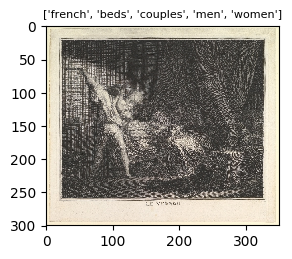

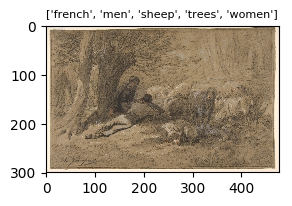

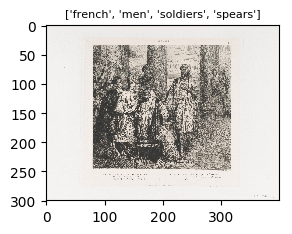

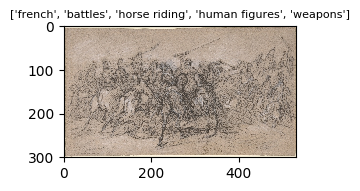

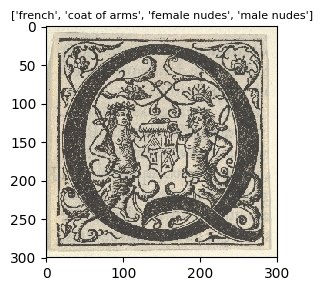

In [721]:
display_culture_examples('french')

Most common tags

MOST COMMON FRENCH TAGS

1). men
2). women
3). flowers
4). leaves
5). portraits


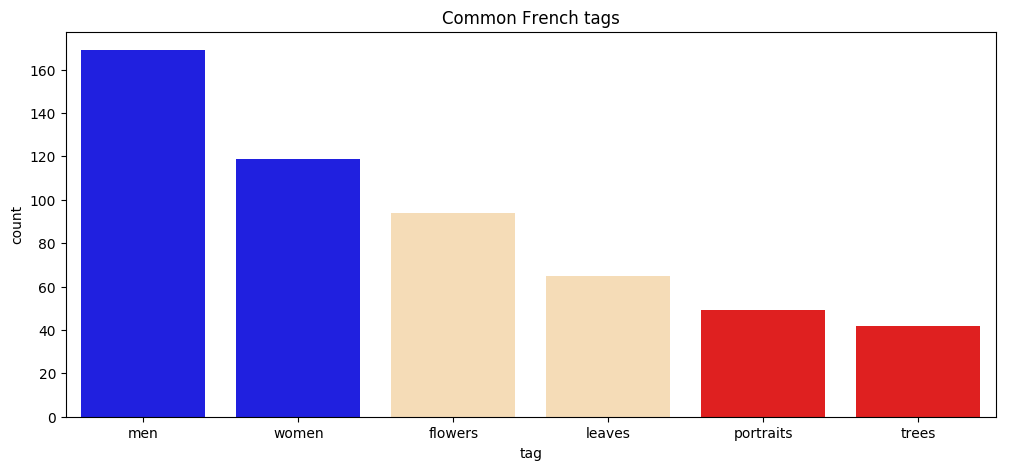

In [722]:
show_common_tags('french', palette=['blue', 'blue', 'navajowhite', 'navajowhite', 'red', 'red'])

The most commmon objects in French culture seem to be portraits and paintings involving human lives (men and women) and nature (flowers and leaves). Some paintings involve couples and some involve people coexisitng with nature (trees and animals). 

### Spain

Some examples

In [ ]:
display_culture_examples('spanish')

Most common tags

In [ ]:
show_common_tags('spanish', palette=['red', 'red', 'yellow', 'yellow', 'red', 'red'])

Spanish culture also includes paintings (like French culture), but more often, you would find textile fragments, accessories and other things related to fashion and clothing. The Spanish paintings mainly focus on humans (men and women) and nature (flowers and leaves), similar like French culture.

### Italy

Some examples

In [ ]:
display_culture_examples('italian')

Most common tags

In [ ]:
show_common_tags('italian', palette=['forestgreen', 'forestgreen', 'navajowhite', 'navajowhite', 'crimson', 'crimson'])

Italian cultural objects consist mainly of paintings involving men, women and nature (like France) and textile fragments (like Spain), but **the key difference is that Italian cultural objects (paintings and textiles) tend to have more religious and spiritual references than their Italian and Spanish counterparts. These references include saints, mythical creatures like Cupid etc.**

### Germany

Some examples

In [ ]:
display_culture_examples('german')

Most common tags

In [ ]:
show_common_tags('german', palette=['black', 'black', 'red', 'red', 'yellow' ,'yellow'])

German cultural objects focus mainly on humans (men and women) and nature (flowers) as well. But, **the main difference between German cultural objects and other Western European objects is that German objects tend to focus more on books than paintings or textiles. German objects also focus on religion, with references to Christ, St. Jermone etc.**

### Conclusion
In general, Western European cultures focus on daily human life and nature. But, some countries' cultures, like Germany and Italy tend to focus more on religion, spirituality and mythical creatures compared to France and Spain. 

## Eastern Europe

### Russia

Some examples

In [ ]:
display_culture_examples('russian')

Most common tags

In [ ]:
show_common_tags('russian', palette=['navajowhite', 'navajowhite', 'blue', 'blue', 'red', 'red'])

Russian culture also seems to **mainly consist of paintings and portraits of humans, especially women**. More art tends to focus on women. There is also an important role of nature in Russian culture. **One special object that appears many times is Russian lace.**

## Scandinavia

### Denmark

Some examples

In [ ]:
display_culture_examples('danish')

Most common tags

In [ ]:
show_common_tags('danish', palette=['red', 'navajowhite', 'red', 'navajowhite', 'red', 'navajowhite'])

Danish cultural objects also mainly consist of portraits and paintings of women (men also, but more of women). It also includes nature in the form of flowers, such as floral plates, floral paintings etc. One important feature of Danish objects is utilitarian objects such as plates, cutlery etc.

### Sweden

Some examples

In [ ]:
display_culture_examples('swedish')

Most common tags

In [ ]:
show_common_tags('swedish', palette=['blue', 'yellow', 'blue', 'yellow', 'blue', 'yellow'])

**Swedish culture is the first culture so far, that does not focus a lot on daily human life.** It mainly includes objects related to Stockholm, the Swedish capital. The objects are generally utilitarian objects like candlesticks and firearms. Some objects are also paintings that focus on music and musicians (guitar) and other paintings include nude women and men.

### Conclusion
Scandinavian Culture mainly focuses on utilitarian objects in general, like cutlery, plates, candlesticks etc, but it also includes paintings focused on women and sometimes music.

## Middle-East

### Iran

Some examples

In [ ]:
display_culture_examples('iran')

Most common tags

In [ ]:
show_common_tags('iran', palette=['limegreen', 'limegreen', 'navajowhite', 'navajowhite', 'red', 'red'])

Irani culture mainly focuses on animals, such as rams, sphinxes etc. They are generally objects depicting these animals. Irani culture also includes small objects like pins, beads and fragments of antique vases. 

### Syria

Some examples

In [ ]:
display_culture_examples('syrian')

Most common tags

In [ ]:
show_common_tags('syrian', palette=['red', 'red', 'green', 'black', 'black'])

Syrian culture mainly consists of ancient writing systems and seals. There are also inscriptions depicting human figures alongside these ancient writings. There are also some utilitarian objects like clothing, accessories and even daggers involved in Syrian culture.

### Assyria (modern day Turkey)

Some examples

In [ ]:
display_culture_examples('assyrian')

Most common tags

In [ ]:
show_common_tags('assyrian', palette=['red', 'red', 'navajowhite', 'navajowhite', 'red', 'red'])

Assyrian culture has similarities with both Irani and Syrian culture. Like Irani culture, there are several inscriptions and objects depicting animals like rams and sphinxes. On the other, there are also seals containing depictions of humans, but there is not much focus on writing (unlike Syrian culture).

### Conclusion
Middle-Eastern Culture tends to focus a lot on animals like rams, horses etc, which the people at that time relied on for their livelihood . It also consists of several seals and slabs containg ancient writings and depictions of humans and animals.

## South Asia

### India

Some examples

In [ ]:
display_culture_examples('india')

Most common tags

In [ ]:
show_common_tags('india', palette=['darkorange', 'darkorange', 'navajowhite', 'navajowhite', 'green', 'green'])

Indian Culture mainly focuses on gods and mythical figures. It consits on many texts, manuscripts and inscriptions about religions like Jainism and Hinduism. There are also depictions of gods like Shiva and Vishnu and animals like the Cow (which is of great importance to Hindus). There are also depictions of human figures.

### China

Some examples

In [ ]:
display_culture_examples('china')

Most common tags

In [ ]:
show_common_tags('china', palette=['gold', 'red', 'red', 'red', 'red', 'gold'])

Unlike Indian Culture, Chinese Culture seems to foucs more on nature (in the form of birds and flowers) and utilitarian objects than religion. It consists of short tapestries and papers containing poems and other writings. There are several utilitarian objects like dishes, vases and especially bottles. There is also the mythical dragon involved in several pieces of art and utilitarian objects.

## Southeast Asia

### Japan

Some examples

In [ ]:
display_culture_examples('japan')

Most common tags

In [ ]:
show_common_tags('japan', palette=['navajowhite', 'navajowhite', 'red', 'red', 'navajowhite', 'navajowhite'])

Japanese Culture focuses a lot on nature as well. It includes paintings of flowers, trees and birds. There are also paintings of humans, boats and water. This represents the importance of the sea and water to the island nation. There are several utilitarian objects like dishes and vases as well as ornamentory items like models of animals like dogs. There are many manuscripts, poems and other forms of writing.

### Vietnam

Some examples

In [ ]:
display_culture_examples('vietnam')

Most common tags

In [ ]:
show_common_tags('vietnam', palette=['red', 'red', 'yellow', 'yellow', 'red', 'red'])

Vietnamese Culture generally consists of utilitarian objects like ewers (wide jugs), pots, containers etc.But, the main highlights are the religious objects representing the Hindu and Buddhist religions and the jewellery. Many metal carvings and artefacts representing Hindu gods like Shiva can be found. There is also ancient jewellery. **There seems to be more focus on religion in Vietnamese cultural objects compared to Japan.**

### Thailand

Some examples

In [ ]:
display_culture_examples('thailand')

Most common tags

In [ ]:
show_common_tags('thailand', palette=['crimson', 'navajowhite', 'darkblue', 'darkblue', 'navajowhite', 'crimson'])

Similar to Vietnamese Culture, Thai Culture includes jewellery and metal carvings of Buddha. There are also several utilitarian objects like tea pots and boxes and ornaments like necklaces.

### Conclusion
Southeast Asian cultures generally include several ancient utilitarian objects like boxes, pots, jugs etc and each country has its own signature style when it comes to these things. In Japan, paintings and writings are more common, whereas in Thailand, utilitarian objects and religious sculptures of Hindu gods and Buddha are more common. Also, Japanses culture tends to put more focus on nature.

## North Africa

### Egypt

Some examples

In [ ]:
display_culture_examples('egyptian')

Most common tags

In [ ]:
show_common_tags('egyptian', palette=['red', 'red', 'navajowhite', 'navajowhite', 'black', 'black'])

Egyptian Culture generally consists of architectural fragments from pyramids, places of worship etc. One major feature of this culture is heiroglyphs, the symbolic writings on the inner walls of pyramids. There are also sculptures of Egyptian gods and pharaohs. Additionally, one can find tools and equipment used by Egyptians.

## North America

### America

Some examples

In [ ]:
display_culture_examples('american')

Most common tags

In [ ]:
show_common_tags('american', palette=['darkblue', 'navajowhite', 'red', 'red', 'navajowhite', 'darkblue'])

American Culture does not consist of any antique objects. It contains modern objects like fashion, accessories and movie posters. There are mainly portraits or pictures of people (men and women), who are generally actresses or actors. There is also modern clothing and accessories on display. Many objects are advertisements of iconic American products, like fashion, food etc.

### Mexico

Some examples

In [ ]:
display_culture_examples('mexican')

Most common tags

In [ ]:
show_common_tags('mexican', palette=['green', 'green', 'navajowhite', 'navajowhite', 'red', 'red'])

Mexican Culture mostly consits of paintings of men, who are in many cases soldiers. There are many writings written by soldiers related to war. The most common objects, however, are tools and equipment used for activities like cooking. There is also plenty of traditional jewellery, traditional musical instruments, inscriptions and utilitarian objecs like purses. There are also several inscriptions. There are many interesting cartoons involving skeletons, demons and other cartoons depicting anger.

### This concludes my cultural analysis ! Thanks for reading ! I hope you found it useful :)

### Please post your feedback and suggestions in the comments.